In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("./data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   input       10 non-null     int64  
 1   output      10 non-null     int64  
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  3 non-null      object 
 4   Unnamed: 4  3 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


In [4]:
x,y = df.input.values , df.output.values
print(f"x={x} len={len(x)}")
print(f"y={y} len={len(y)}")

x=[ 1  2  3  4  5  6  7  8  9 10] len=10
y=[ 2  4  6  8 10 12 14 16 18 20] len=10


# data spliting for ML model (Ratio)
* 70% for training 30% for testing
* 80% for training 20% for testing
* 60% for training 40% for testing

* 60% for training, 20% validation, 20% for Testing


In [14]:
print(f"x={x} len={len(x)}")
print(f"y={y} len={len(y)}")

train_ratio = 80
t_end = len(x) * train_ratio // 100
x_train = x[:t_end]
x_test = x[t_end:]
print(x_train,x_test)


t_end = len(y) * train_ratio // 100
y_train = y[:t_end]
y_test = y[t_end:]
print(y_train,y_test)

x=[ 1  2  3  4  5  6  7  8  9 10] len=10
y=[ 2  4  6  8 10 12 14 16 18 20] len=10
[1 2 3 4 5 6 7 8] [ 9 10]
[ 2  4  6  8 10 12 14 16] [18 20]


# Now apply train test spliting with sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
print(f"x={x} len={len(x)}")
print(f"y={y} len={len(y)}")

train_test_split(x,y, test_size=0.3)

x=[ 1  2  3  4  5  6  7  8  9 10] len=10
y=[ 2  4  6  8 10 12 14 16 18 20] len=10


[array([ 6,  3,  1, 10,  5,  9,  4], dtype=int64),
 array([2, 7, 8], dtype=int64),
 array([12,  6,  2, 20, 10, 18,  8], dtype=int64),
 array([ 4, 14, 16], dtype=int64)]

In [19]:
print(f"x={x} len={len(x)}")
print(f"y={y} len={len(y)}")

train_test_split(x,y, test_size=0.3, shuffle=False)

x=[ 1  2  3  4  5  6  7  8  9 10] len=10
y=[ 2  4  6  8 10 12 14 16 18 20] len=10


[array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([ 8,  9, 10], dtype=int64),
 array([ 2,  4,  6,  8, 10, 12, 14], dtype=int64),
 array([16, 18, 20], dtype=int64)]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=False)

print(f"x train {x_train}, x test {x_test}")
print(f"y train {y_train}, y test {y_test}")

x train [1 2 3 4 5 6 7], x test [ 8  9 10]
y train [ 2  4  6  8 10 12 14], y test [16 18 20]


# Now dealing with image data

(315, 315, 3)


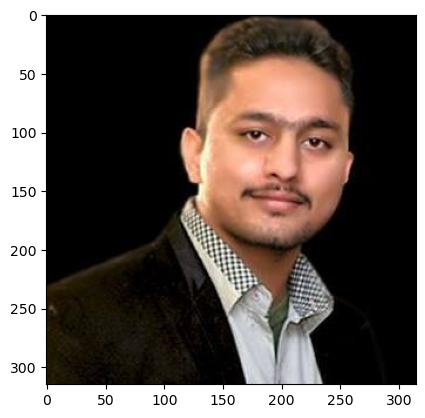

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('qasim.jpeg') #load image RGB images.
print(img.shape)
plt.imshow(img)

(1500, 1500, 4)


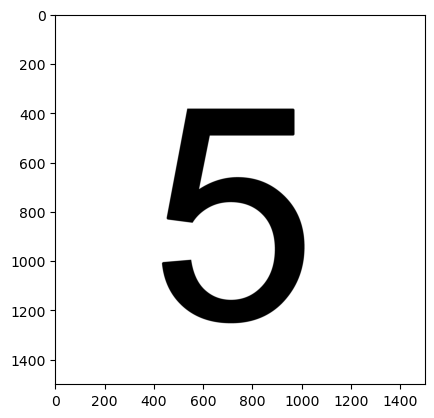

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread('5.png',format='png') #load image RGB images.
img = mpimg.imread('5.png') #load image RGB images.
print(img.shape)
plt.imshow(img)

In [24]:
from PIL import Image

img = Image.open('5.png') # load image with operating system image viwer application
img.show()

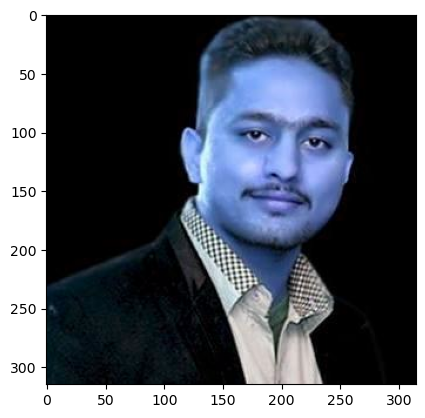

In [25]:
import cv2

img = cv2.imread('qasim.jpeg') # GBR <- RGB
plt.imshow(img)
plt.show()

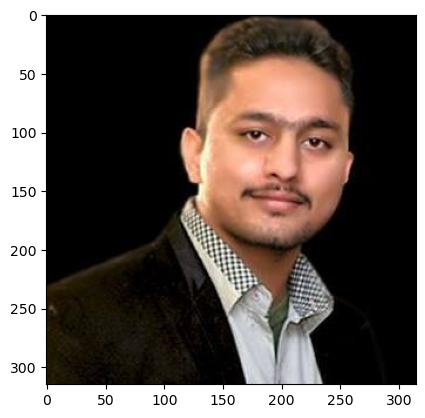

In [26]:
import cv2

img = cv2.imread('qasim.jpeg') # GBR <- RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Handle data with tensorflow from any folder directroy for training purpose¶

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1.0/255)#rescale=1.0/255
training_dir = 'training' # folder path


# now loading or generate tensor or numpy array from folder 
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

Found 4 images belonging to 2 classes.


In [39]:
train_generator.labels

array([0, 0, 1, 1])

In [25]:
train_generator[0][0]

array([[[[0.8470589 , 0.82745105, 0.7019608 ],
         [0.86666673, 0.8470589 , 0.73333335],
         [0.8862746 , 0.86274517, 0.7607844 ],
         ...,
         [0.9333334 , 0.87843144, 0.82745105],
         [0.9294118 , 0.882353  , 0.82745105],
         [0.8980393 , 0.8745099 , 0.8117648 ]],

        [[0.8431373 , 0.8235295 , 0.69803923],
         [0.86666673, 0.8470589 , 0.73333335],
         [0.8862746 , 0.86274517, 0.7607844 ],
         ...,
         [0.9176471 , 0.882353  , 0.8235295 ],
         [0.9215687 , 0.8862746 , 0.82745105],
         [0.9176471 , 0.8470589 , 0.79215693]],

        [[0.83921576, 0.8196079 , 0.69411767],
         [0.86274517, 0.8431373 , 0.7294118 ],
         [0.882353  , 0.8588236 , 0.7568628 ],
         ...,
         [0.9215687 , 0.8862746 , 0.82745105],
         [0.9294118 , 0.882353  , 0.82745105],
         [0.9294118 , 0.8352942 , 0.78823537]],

        ...,

        [[0.72156864, 0.5882353 , 0.45098042],
         [0.72156864, 0.5882353 , 0.45098042]

In [9]:
train_generator[0][1]

array([1., 0., 0., 1.], dtype=float32)

Labels of this image = 1.0


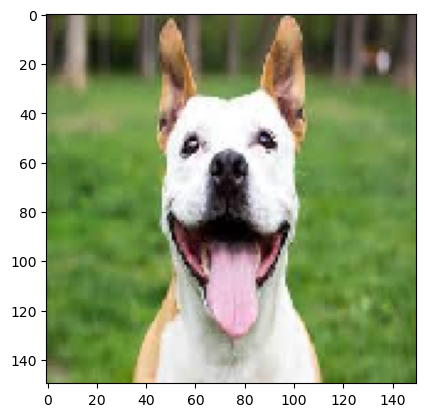

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(train_generator[0][0][1])
print(f"Labels of this image = {train_generator[0][1][1]}")

(150, 150, 3)


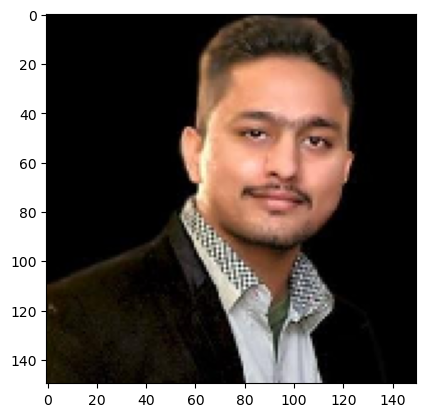

In [40]:
from tensorflow.keras.preprocessing import image


img = image.load_img('qasim.jpeg', target_size=(150,150), color_mode="rgb")
img = image.img_to_array(img)
print(img.shape)
plt.imshow(img/255)


# Working with Audio Data¶

In [42]:
from scipy.io import wavfile

rate1, dat1 = wavfile.read('audio.wav')
print(rate1)
print(dat1)

8000
[[ -114    23]
 [ -241     3]
 [ -285   -29]
 ...
 [ -772 -1059]
 [ -422  -840]
 [ -787  -314]]


C:\Users\saylani\AppData\Local\Temp\ipykernel_27104\4141441573.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate1, dat1 = wavfile.read('audio.wav')


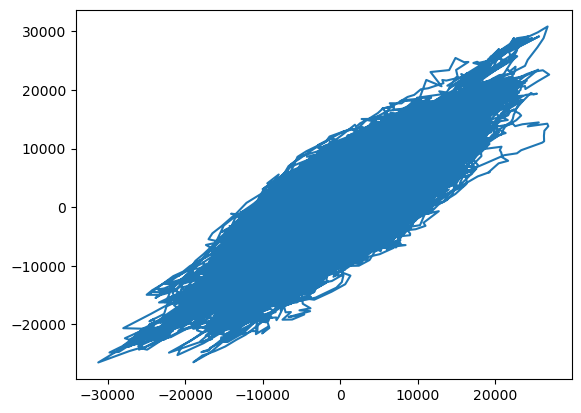

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(dat1[:,0], dat1[:,1])

In [50]:
dat1[:,0]

array([-114, -241, -285, ..., -772, -422, -787], dtype=int16)

In [51]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
 
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
import cv2

cap = cv2.VideoCapture("mov_bbb.mp4")
ret, frame = cap.read()
while(1):
   ret, frame = cap.read()
   cv2.imshow('frame',frame)
   if cv2.waitKey(2) & 0xFF == ord('q') or ret==False :
       cap.release()
       cv2.destroyAllWindows()
       break
   cv2.imshow('frame',frame)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
